In [2]:
%load_ext autoreload

In [4]:
%autoreload

import numpy as np
from scipy.optimize import least_squares

import healpy as hp
from astropy.io import fits

from tqdm.notebook import tqdm 

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [11]:
file = 'lambda_haslam408_dsds.fits'#'MAIPU_MU_1_64.fits' # #lambda_haslam408_nofilt.fits'#'haslam408_dsds_Remazeilles2014.fits' #

radio_map = fits.open(file)
radio_data = radio_map[1].data # assuming the first extension is a table

radio_temps = hp.reorder(radio_data['TEMPERATURE'], n2r = True)

radio_error = 1.2 + 0.1 * radio_temps 

radio_temps = radio_temps - 2.723922

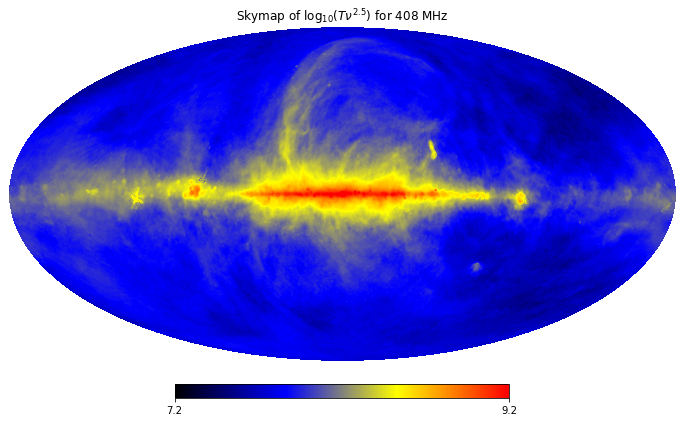

In [10]:
fng_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["black", "blue", "yellow","red"])

map = np.log10(radio_temps * (408 ** 2.5))

plt.figure(figsize=(12,8))

hp.mollview(map, xsize = 4000, nest = False, hold = True, min = 7.2, max = 9.2, cmap = fng_cmap, title=r"Skymap of $\log_{10}(T \nu ^{2.5})$ for 408 MHz")

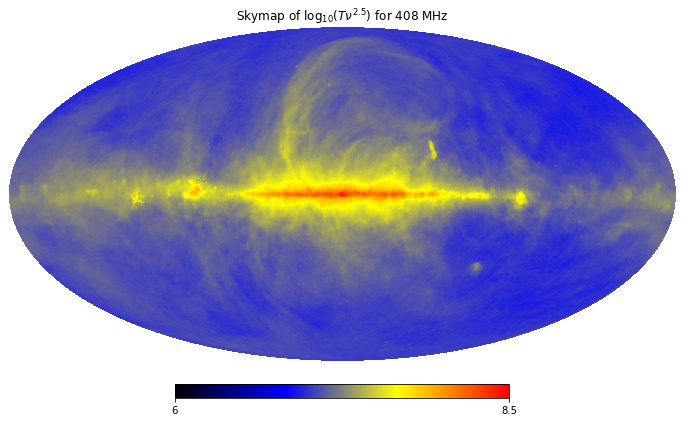

In [13]:
fng_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["black", "blue", "yellow","red"])

map = np.log10(radio_error * (408 ** 2.5))

plt.figure(figsize=(12,8))

hp.mollview(map, xsize = 4000, nest = False, hold = True, min = 6, max = 8.5, cmap = fng_cmap, title=r"Skymap of $\log_{10}(T \nu ^{2.5})$ for 408 MHz")

In [17]:
nside = hp.npix2nside(len(radio_temps))
pix_list = np.arange(len(radio_temps))
vectors = hp.pix2vec(nside, pix_list)

mag_turb_error = np.zeros_like(radio_temps)

for idx,_ in enumerate(tqdm(pix_list)):

    inds = hp.query_disc(
        nside, 
        (vectors[0][idx], vectors[1][idx], vectors[2][idx]), 
        radius = 7.35 * (np.pi / 180.), 
        inclusive = True
    )

    mag_turb_error[idx] = np.var(radio_temps[inds])



# mag_turb_error 

  0%|          | 0/3145728 [00:00<?, ?it/s]

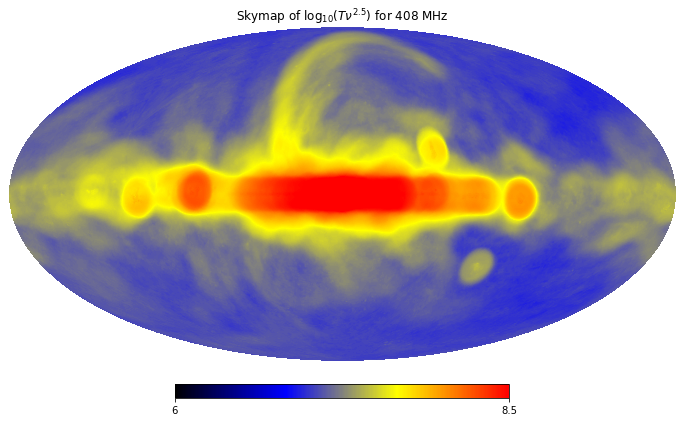

In [18]:
map = np.log10(np.sqrt(radio_error**2 + mag_turb_error) * (408 ** 2.5))

plt.figure(figsize=(12,8))

hp.mollview(map, xsize = 4000, nest = False, hold = True, min = 6, max = 8.5, cmap = fng_cmap, title=r"Skymap of $\log_{10}(T \nu ^{2.5})$ for 408 MHz")